# 🚗 Auto Dataset Preparation 🚗

### Step 1: Duplicates

In both the auto-mpg and auto-prices datasets, duplicates were identified based on the columns "car name" and "model year". The duplicate indexes were stored in a list and the rows corresponding to those indexes were dropped. The first occurence of that index was kept but any subsequent ones were dropped. 

In [1]:
from mypytable import MyPyTable #so all functions can be used from mypytable.py
import utils
import importlib
importlib.reload(utils)

# load datasets
auto_mpg_table = utils.load_dataset("input_data/auto-mpg.txt")
auto_prices_table = utils.load_dataset("input_data/auto-prices.txt")

# display original number of instances in each datasset
utils.display_dataset_info(auto_mpg_table, "auto_mpg")
utils.display_dataset_info(auto_prices_table, "auto_prices")

# clean duplicates and save cleaned datasets
mpg_duplicates = utils.clean_duplicates(auto_mpg_table, ['car name', 'model year'], "output_data/auto-mpg-no-dups.txt")
prices_duplicates = utils.clean_duplicates(auto_prices_table, ['car name', 'model year'], "output_data/auto-prices-no-dups.txt")

# show duplicate information after cleaning
print("Index/Indexes where duplicates are in auto_mpg dataset after cleaning:", utils.check_cleaned_duplicates(auto_mpg_table, ['car name', 'model year']))
print("Index/Indexes where duplicates are in auto_prices dataset after cleaning:", utils.check_cleaned_duplicates(auto_prices_table, ['car name', 'model year']))

# Display number of instances in each dataset after cleaning
utils.display_dataset_info(auto_mpg_table, "auto_mpg")
utils.display_dataset_info(auto_prices_table, "auto_prices")

This is the number of instances in the auto_mpg dataset:  (316, 9)
This is the number of instances in the auto_prices dataset:  (268, 3)
Index/Indexes where duplicates are in auto_mpg dataset after cleaning: []
Index/Indexes where duplicates are in auto_prices dataset after cleaning: []
This is the number of instances in the auto_mpg dataset:  (315, 9)
This is the number of instances in the auto_prices dataset:  (267, 3)


### Step 2: Manual Clean

In [2]:
from mypytable import MyPyTable #so all functions can be used from mypytable.py
import utils
import importlib
importlib.reload(utils)

# load no duplicates datasets
auto_mpg_no_dups_table = utils.load_dataset("output_data/auto-mpg-no-dups.txt")
auto_prices_no_dups_table = utils.load_dataset("output_data/auto-prices-no-dups.txt")

# Perform the full outer join
outer_joined_table = auto_mpg_no_dups_table.perform_full_outer_join(auto_prices_no_dups_table, ['car name', 'model year'] )

# Pretty print the outer joined table
print("\nThis is the first outer join before manual clean:")
outer_joined_table.pretty_print(10)

# load manually cleaned datasets 
auto_mpg_clean_table = utils.load_dataset("input_data/auto-mpg-clean.txt")
auto_prices_clean_table = utils.load_dataset("input_data/auto-prices-clean.txt")

# display number of instances after cleaning
utils.display_dataset_info(auto_mpg_clean_table, "auto-mpg")
utils.display_dataset_info(auto_prices_clean_table, "auto-prices")



This is the first outer join before manual clean:
mpg      cylinders    displacement    horsepower    weight    acceleration    model year    origin  car name                            msrp
-----  -----------  --------------  ------------  --------  --------------  ------------  --------  --------------------------------  ------
18.0             8             307           130      3504            12              70         1  chevrolet chevelle malibu           2881
15.0             8             350           165      3693            11.5            70         1  buick skylark 320                   2847
18.0             8             318           150      3436            11              70         1  plymouth satellite                  2831
17.0             8             302           140      3449            10.5            70         1  ford torino                         2778
15.0             8             429           198      4341            10              70         1  for

Manual Changes:
1. For Audi 100 ls, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
2. For the BMW 2002, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
3. For the Chevy c20, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
4. For the Dodge d200, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
5. For the Ford f250, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
6. For the Peugeot 504, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
7. For the Saab 99e, the year was changed to 70 from 71 in the price table to correspond to the 70 value in the mpg table
8. For the Toyota Corona Mark ii (sw), the "toyoto" part of the name in the price table was corrected to "toyota" so the names would properly match

### Step 3: Outer Join (again)

In [3]:
from mypytable import MyPyTable #so all functions can be used from mypytable.py
import utils
import importlib
importlib.reload(utils)

# load cleaned data
auto_mpg_clean_table = utils.load_dataset("input_data/auto-mpg-clean.txt")
auto_price_clean_table = utils.load_dataset("input_data/auto-prices-clean.txt")

# Perform the full outer join
full_outer_joined_table = auto_mpg_clean_table.perform_full_outer_join(auto_price_clean_table, ['car name', 'model year'] )

# Pretty print the outer joined table
print("\nThis is the official outer join:")
full_outer_joined_table.pretty_print(10)

# Write the result to output_data/auto-data.txt
full_outer_joined_table.save_to_file("output_data/auto-data.txt")

# count number of instances
auto_data_instances = full_outer_joined_table.get_shape()
print("\nThis is the number of instances in the Auto Data table after full join:", auto_data_instances)


This is the official outer join:
mpg      cylinders    displacement    horsepower    weight    acceleration    model year    origin  car name                            msrp
-----  -----------  --------------  ------------  --------  --------------  ------------  --------  --------------------------------  ------
18.0             8             307           130      3504            12              70         1  chevrolet chevelle malibu           2881
15.0             8             350           165      3693            11.5            70         1  buick skylark 320                   2847
18.0             8             318           150      3436            11              70         1  plymouth satellite                  2831
17.0             8             302           140      3449            10.5            70         1  ford torino                         2778
15.0             8             429           198      4341            10              70         1  ford galaxie 500    

### Step 4: Summary Stats

In [4]:
# load new auto data
auto_data_summary_table = MyPyTable()
auto_data_summary_table.load_from_file("output_data/auto-data.txt")

# compute summary statistics for each continuous attribute
summary_statistics_table = auto_data_summary_table.compute_summary_statistics([
    "mpg", "displacement", "horsepower", "weight", "acceleration", "model year", "msrp"
])

# Pretty print the summary statistics
summary_statistics_table.pretty_print()

attribute       min      max       mid        avg    median
------------  -----  -------  --------  ---------  --------
mpg               9     43.1     26.05    21.1068        20
displacement     68    455      261.5    214.319        200
horsepower       46    230      138      111.888        100
weight         1613   5140     3376.5   3123.71        3086
acceleration      8     24.8     16.4     15.2105        15
model year       70     79       74.5     74.4667        74
msrp           1798  21497    11647.5   4112.57        3789


### Step 5: Missing Values

This step outlines two approaches for dealing with missing values in a dataset:
1. The `first` approach is shown first and simple removes all instances that contain an "NA". As seen below, this reduces the amount of data we have, by removing 55 rows. 

2. The `second` approach is usually **preferred** and instead of removing valuable data, the missing value is replaced by the column average and the data is retained.  

In [5]:
# 1. The first approach should be to remove all instances with missing values.
    # - count the number of instances and display summary statistics

# load data
auto_data_remove_NA = MyPyTable()
auto_data_remove_NA.load_from_file("output_data/auto-data.txt")

# remove all instances with missing values
auto_data_remove_NA.remove_rows_with_missing_values()  # calls function from mypytable.py

# use pretty print to show new cleaned table with no NA values
print("After removing NA values:")
auto_data_remove_NA.pretty_print(10)  

# count instances of cleaned data
print("")
cleaned_count = len(auto_data_remove_NA.data)  
print("The number of instances after removing missing values:", cleaned_count)

# display summary statistics for this cleaned data
print("")
summary_statistics_table = auto_data_remove_NA.compute_summary_statistics([
    "mpg", "displacement", "horsepower", "weight", "acceleration", "model year", "msrp"
])

# Pretty print the summary statistics
summary_statistics_table.pretty_print()

auto_data_remove_NA.save_to_file("output_data/auto-data-remove-NA.txt")


After removing NA values:
  mpg    cylinders    displacement    horsepower    weight    acceleration    model year    origin  car name                     msrp
-----  -----------  --------------  ------------  --------  --------------  ------------  --------  -------------------------  ------
   18            8             307           130      3504            12              70         1  chevrolet chevelle malibu    2881
   15            8             350           165      3693            11.5            70         1  buick skylark 320            2847
   18            8             318           150      3436            11              70         1  plymouth satellite           2831
   17            8             302           140      3449            10.5            70         1  ford torino                  2778
   15            8             429           198      4341            10              70         1  ford galaxie 500             3137
   14            8             454  

In [6]:
# 2. The second approach should be to replace missing values with their corresponding attribute's average value.
    #- count the number of instances and display summary statistics

# load data
auto_data_replace_NA = MyPyTable()
auto_data_replace_NA.load_from_file("output_data/auto-data.txt")

# remove all instances with missing values (three columns with NA)
auto_data_replace_NA.replace_missing_values_with_column_average("msrp")  # calls function from mypytable.py
auto_data_replace_NA.replace_missing_values_with_column_average("mpg") 
auto_data_replace_NA.replace_missing_values_with_column_average("horsepower")

# use pretty print to show new cleaned table with no NA values
print("After replacing NA values with column average:")
auto_data_replace_NA.pretty_print(10)  

# count instances of cleaned data
print("")
replaced_count = len(auto_data_replace_NA.data)  
print("The number of instances after removing missing values:", replaced_count)

# display summary statistics for this cleaned data
print("")
summary_statistics_table = auto_data_replace_NA.compute_summary_statistics([
    "mpg", "displacement", "horsepower", "weight", "acceleration", "model year", "msrp"
])

# Pretty print the summary statistics
summary_statistics_table.pretty_print()

auto_data_replace_NA.save_to_file("output_data/auto-data-replaced-NA.txt")


After replacing NA values with column average:
    mpg    cylinders    displacement    horsepower    weight    acceleration    model year    origin  car name                            msrp
-------  -----------  --------------  ------------  --------  --------------  ------------  --------  --------------------------------  ------
18                 8             307           130      3504            12              70         1  chevrolet chevelle malibu           2881
15                 8             350           165      3693            11.5            70         1  buick skylark 320                   2847
18                 8             318           150      3436            11              70         1  plymouth satellite                  2831
17                 8             302           140      3449            10.5            70         1  ford torino                         2778
15                 8             429           198      4341            10              70     

# 🚗 Auto Dataset Visualization 🚗

### Step 6 Frequency Diagrams

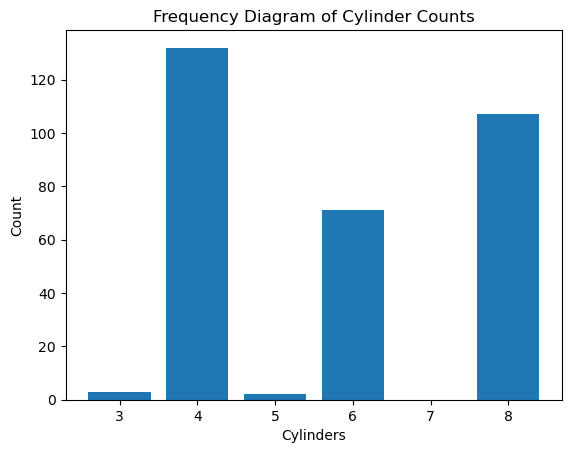

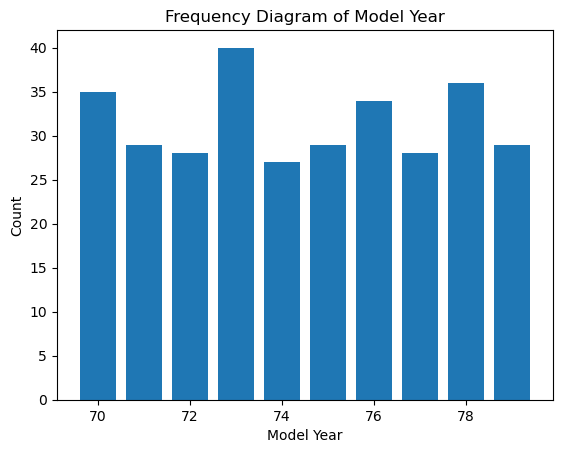

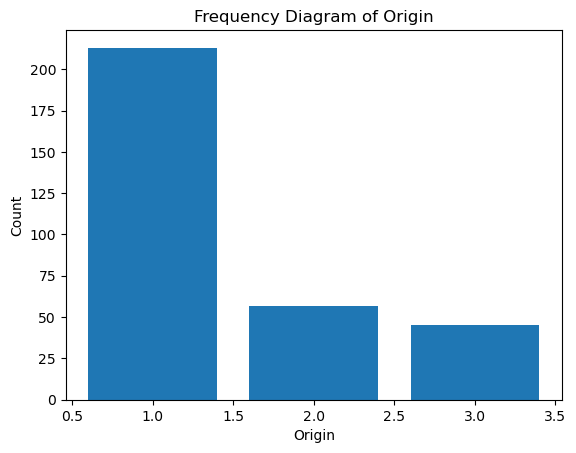

In [7]:
import matplotlib.pyplot as plt
import utils
import plot_utils
import importlib
importlib.reload(utils)
importlib.reload(plot_utils)

plot_utils.frequency_diagram(
    filename="output_data/auto-data-replaced-NA.txt", 
    column="cylinders", 
    xlabel="Cylinders", 
    ylabel="Count", 
    title="Frequency Diagram of Cylinder Counts"
)

plot_utils.frequency_diagram(
    filename="output_data/auto-data-replaced-NA.txt", 
    column="model year", 
    xlabel="Model Year", 
    ylabel="Count", 
    title="Frequency Diagram of Model Year"
)

plot_utils.frequency_diagram(
    filename="output_data/auto-data-replaced-NA.txt", 
    column="origin", 
    xlabel="Origin", 
    ylabel="Count", 
    title="Frequency Diagram of Origin"
)

### Step 7: Discretization and Frequency Diagrams

`Approach 1:` The US Department of Energy (DOE) assigns gasoline vehicles a fuel economy rating from 1 (worst) to 10 (best). The ratings are defined in terms of MPG. Use these ranges to define category values (denoting rating 1 to 10) for the MPG attribute.

<function matplotlib.pyplot.show(close=None, block=None)>

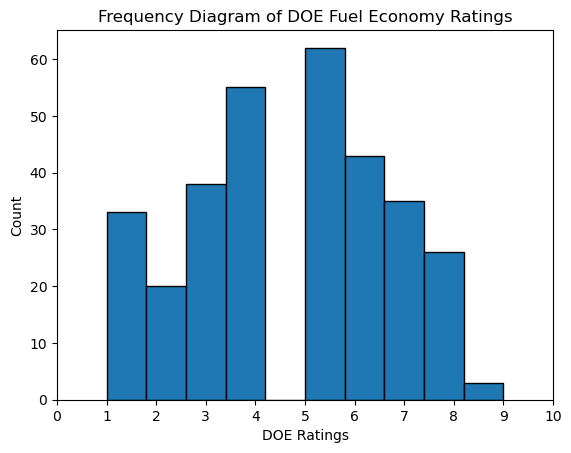

In [8]:
from mypytable import MyPyTable #so all functions can be used from mypytable.py
import utils
import importlib
importlib.reload(utils)

# load data here
table = utils.load_dataset("output_data/auto-data-replaced-NA.txt") 
mpg_col = table.get_column("mpg")

# loop through mpg column and assign ratings based on criteria outlined in function
doe_ratings =[]
for value in mpg_col:
    doe_ratings.append(utils.DOE_rating_assign(value))

# plot histogram
import matplotlib.pyplot as plt
plt.figure()
plt.hist(doe_ratings, bins = 10, edgecolor = "black")
plt.xlabel("DOE Ratings")
plt.ylabel("Count")
plt.title("Frequency Diagram of DOE Fuel Economy Ratings")
plt.xticks(range(0,11))
plt.show


Something to note on this frequency diagram is many mpg values **didn't fit into any of the predefined categories (ex. 26.5)**, and were assigned 0 as a result. To address this issue, I `used the round function` to round each mpg value to the nearest integer (ex. 26.5 would be rounded to 27 etc). This ensured that each mpg value was mapped to its correct bin or closest correct bin. 

While this helped make the diagram more representative of the data, it also led to a gap in the middle where no values were assigned. I believe this was due to rounding the numbers because I did not have this problem without rounding and instead had my data at 0.   

`Approach 2:` Create 5 "equal-width" bins to generate categories. Each bin should divide up the range of MPG values into equal subranges, where value 1 denotes the smallest subrange of values and 5 the largest subrange of values.

[9.0, 15.82, 22.64, 29.46, 36.28, 43.1]
[74, 124, 79, 35, 3]


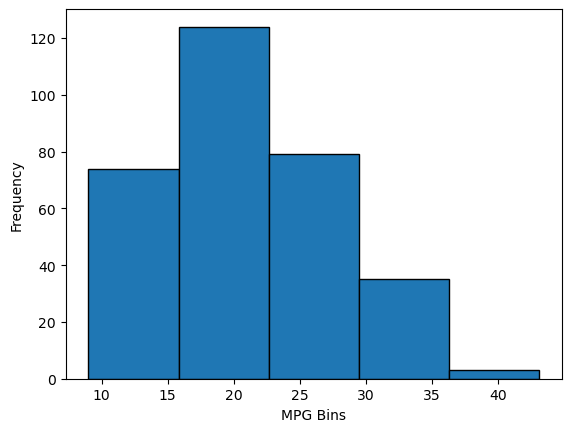

In [9]:
from mypytable import MyPyTable #so all functions can be used from mypytable.py
import utils
import importlib
importlib.reload(utils)

# load data
table = utils.load_dataset("output_data/auto-data-replaced-NA.txt")

# Extract the column 'MPG' (or another relevant column) for binning
values = table.get_column('mpg')

# Compute the cutoffs and frequencies
cutoffs = utils.compute_equal_width_cutoffs(values, 5)
print(cutoffs)  # Print the cutoffs to verify
freqs = utils.compute_bin_frequencies(values, cutoffs)
print(freqs)  # Print frequencies to verify

# Plotting the bar chart
import matplotlib.pyplot as plt
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1] - cutoffs[0]), edgecolor="black", align="edge")
plt.xlabel('MPG Bins')
plt.ylabel('Frequency')
plt.show()

### Step 8: Histograms

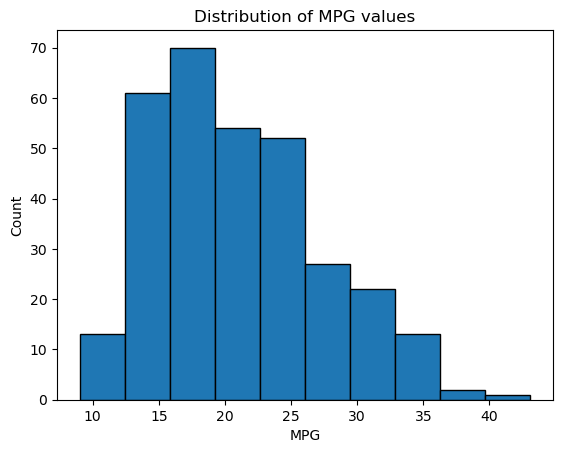

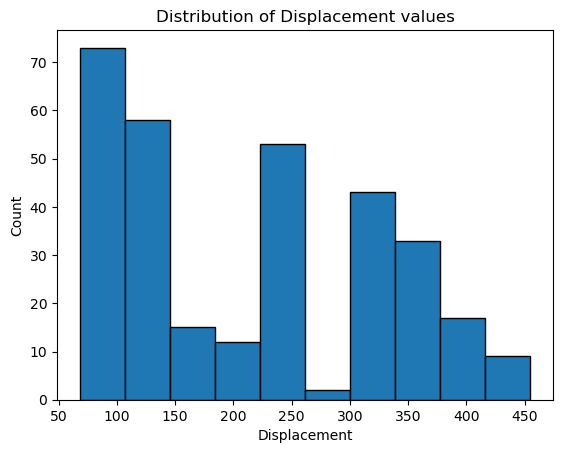

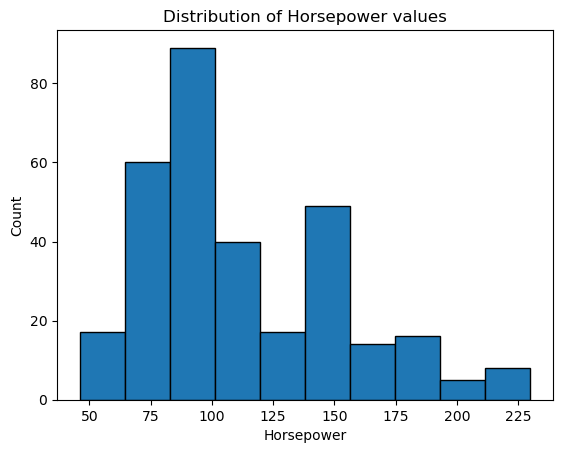

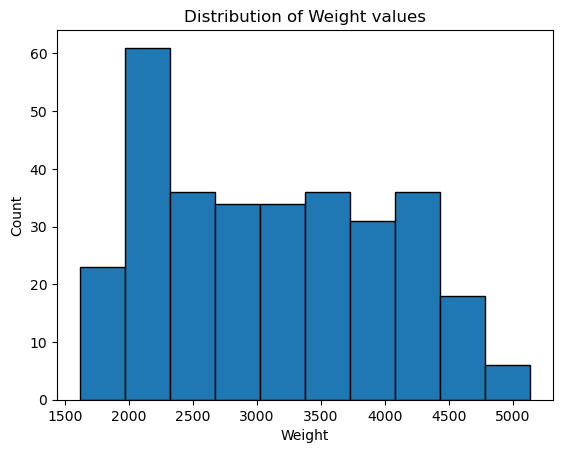

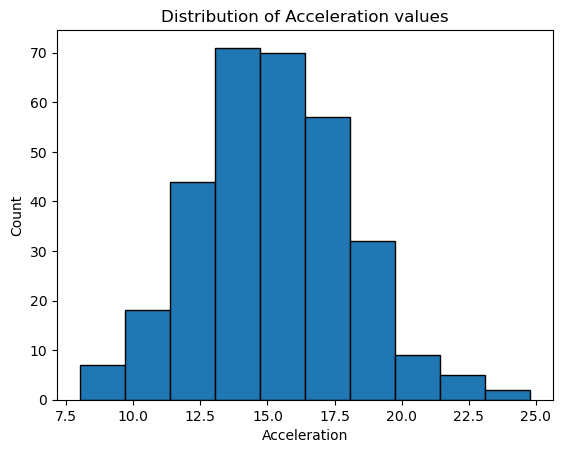

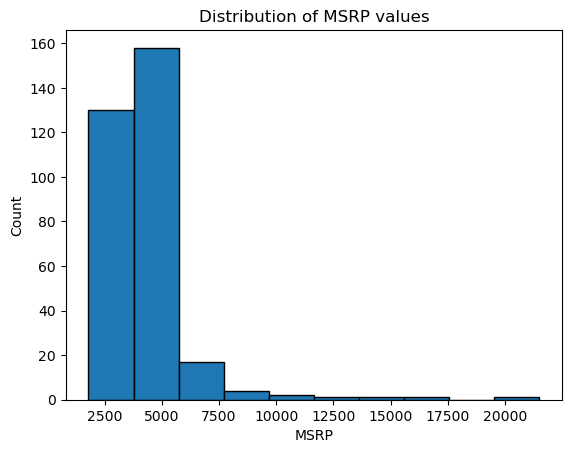

In [10]:
import matplotlib.pyplot as plt
import utils
import plot_utils
import importlib
importlib.reload(utils)
importlib.reload(plot_utils)

plot_utils.create_histogram(
    filename="output_data/auto-data-replaced-NA.txt",
    column = "mpg",
    xlabel = "MPG",
    ylabel = "Count",
    title = "Distribution of MPG values"

)

plot_utils.create_histogram(
    filename="output_data/auto-data-replaced-NA.txt",
    column = "displacement",
    xlabel = "Displacement",
    ylabel = "Count",
    title = "Distribution of Displacement values"

)

plot_utils.create_histogram(
    filename="output_data/auto-data-replaced-NA.txt",
    column = "horsepower",
    xlabel = "Horsepower",
    ylabel = "Count",
    title = "Distribution of Horsepower values"

)

plot_utils.create_histogram(
    filename="output_data/auto-data-replaced-NA.txt",
    column = "weight",
    xlabel = "Weight",
    ylabel = "Count",
    title = "Distribution of Weight values"
)

plot_utils.create_histogram(
    filename="output_data/auto-data-replaced-NA.txt",
    column = "acceleration",
    xlabel = "Acceleration",
    ylabel = "Count",
    title = "Distribution of Acceleration values"
)


plot_utils.create_histogram(
    filename="output_data/auto-data-replaced-NA.txt",
    column = "msrp",
    xlabel = "MSRP",
    ylabel = "Count",
    title = "Distribution of MSRP values"

)

This step created six histograms showing the values for the following attributes: MPG, Diplacement, Horespower, Weight, Acceleration, and MSRP. Here is an analysis of each histogram regarding its shape:

1. `MPG`: the shape of the histogram show that the data is skewed right.

2. `Displacement`: the shape of the histogram is roughly skewed right but also could be described as multimodal. 
3. `Horsepower`: the shape of the histogram is also roughly skewed towards the right but could also be described as bimodal. 
4. `Weight`: the shape of the histogram is pretty uniform.
5. `Acceleration`: the shape of the histogram shows that the data is symeetric and unimodal. 
6. `MSRP`: the shape of the histogram indicates that the data is definitely skewed towards the right since the majority of the data has lower MSRP values. 

### Step 9 Continuous/Continuous Relationships and Scatter Plots 

**These are the formulas used in this step:**

`This are the steps taken to calculate the Linear Regression Line`
1. This is the calculation used for the slope using the means (where n is the number of data points):
$$m = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$
2. We then calculate the y intercept now that we know the slope as b = $\bar{y} - m\bar{x}$
     
The correlation coefficient $r$ helps checks how good the linear relationship is:

`This is the equation used to calculate this correlation coefficient:`
$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$


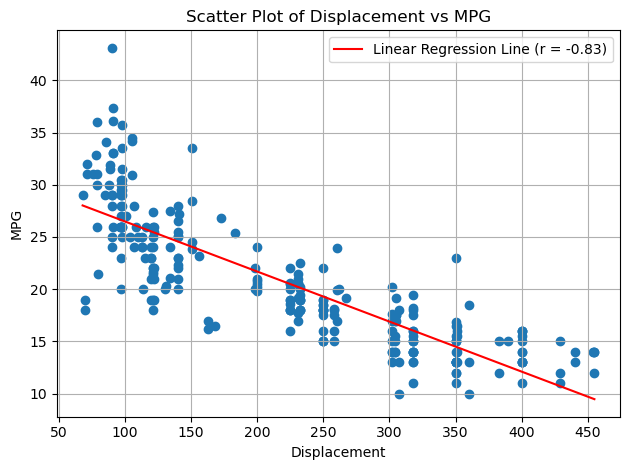

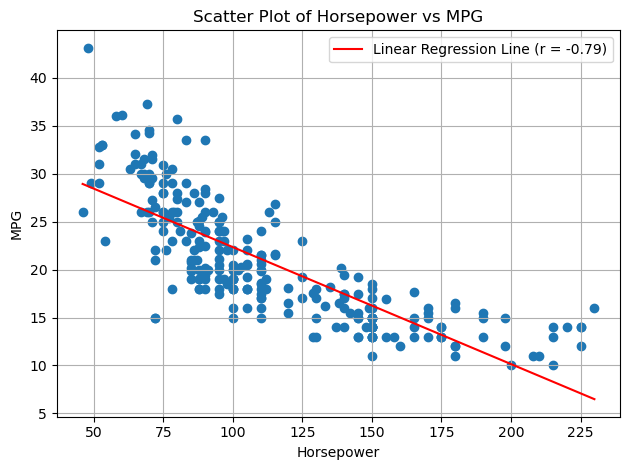

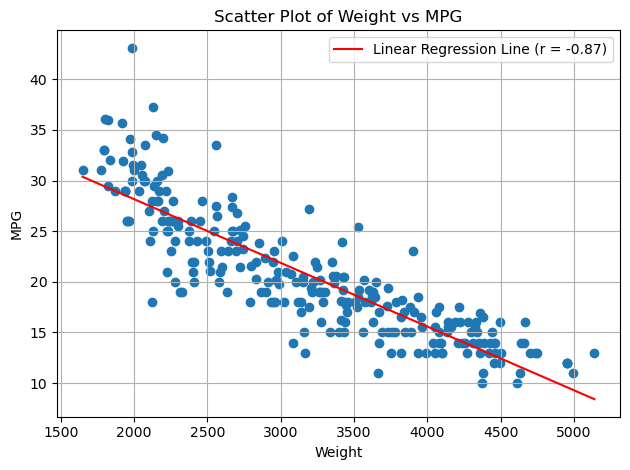

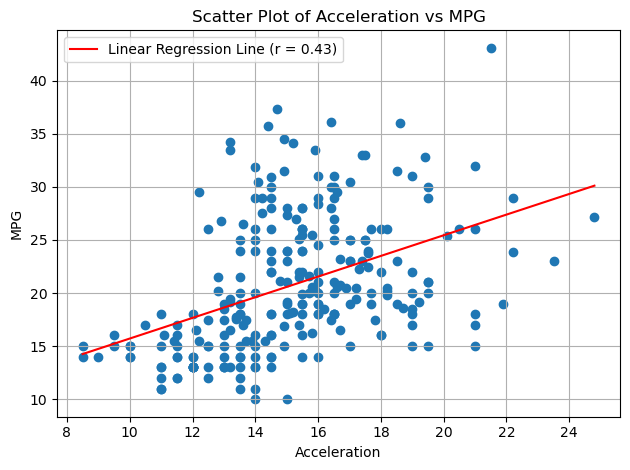

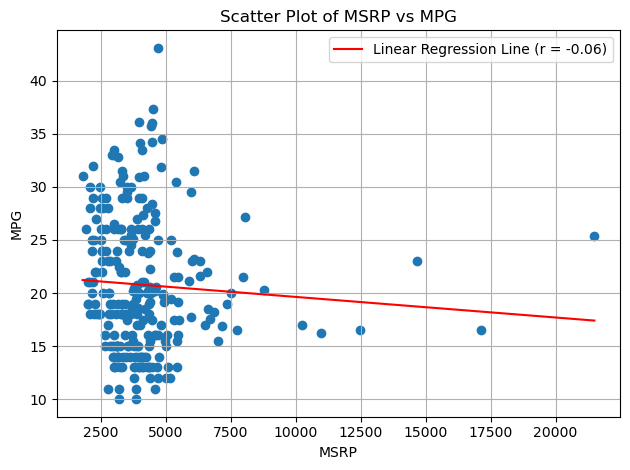

In [11]:
import utils
import plot_utils
import importlib
importlib.reload(utils)
importlib.reload(plot_utils)

plot_utils.scatterPlot_w_linear_regression_line_rCorrelation(
    col_name="displacement",  # Replace with any other column name as needed
    x_values=None,  # x_values will be calculated in the function
    y_values=None,  # y_values will be calculated in the function
    xlabel="Displacement",
    ylabel="MPG",
    title="Scatter Plot of Displacement vs MPG"
)

plot_utils.scatterPlot_w_linear_regression_line_rCorrelation(
    col_name="horsepower",  # Replace with any other column name as needed
    x_values=None,  # x_values will be calculated in the function
    y_values=None,  # y_values will be calculated in the function
    xlabel="Horsepower",
    ylabel="MPG",
    title="Scatter Plot of Horsepower vs MPG"
)

plot_utils.scatterPlot_w_linear_regression_line_rCorrelation(
    col_name="weight",  # Replace with any other column name as needed
    x_values=None,  # x_values will be calculated in the function
    y_values=None,  # y_values will be calculated in the function
    xlabel="Weight",
    ylabel="MPG",
    title="Scatter Plot of Weight vs MPG"
)

plot_utils.scatterPlot_w_linear_regression_line_rCorrelation(
    col_name="acceleration",  # Replace with any other column name as needed
    x_values=None,  # x_values will be calculated in the function
    y_values=None,  # y_values will be calculated in the function
    xlabel="Acceleration",
    ylabel="MPG",
    title="Scatter Plot of Acceleration vs MPG"
)

plot_utils.scatterPlot_w_linear_regression_line_rCorrelation(
    col_name="msrp",  # Replace with any other column name as needed
    x_values=None,  # x_values will be calculated in the function
    y_values=None,  # y_values will be calculated in the function
    xlabel="MSRP",
    ylabel="MPG",
    title="Scatter Plot of MSRP vs MPG"
)


This step created five scatter plots that compared Displacement, Horsepower, Weight, Acceleration, and MSRP to MPG. The linear regression line and correlation coefficient was plotted on each scatter plot to determine the strength of the relationship for each graph. 

1. `Displacement`: This scatter plot had a fairly good negative relationship with an r correlation of -0.83. 

2. `Horsepower`: This scatter plot also had a fairly good negative relationship with an r correlation of -0.79.
3. `Weight`: This was the **strongest relationship** of all the scatter plots with a strong negative relationship with a negative correlation of -0.87. 
4. `Acceleration`: This was a pretty weak relationship with a positive r correlation of 0.43. Most of the points were scattered away from the line. 
5. `MSRP`: This was by far the **weakest relationship** of all the scatter plots with a slight negative r correlation of -0.06. Since it's so close to 0, it indicates there's not a relationship between MSRP and MPG. 

### Bonus (5 pts) Categorical/Continuous Relationships

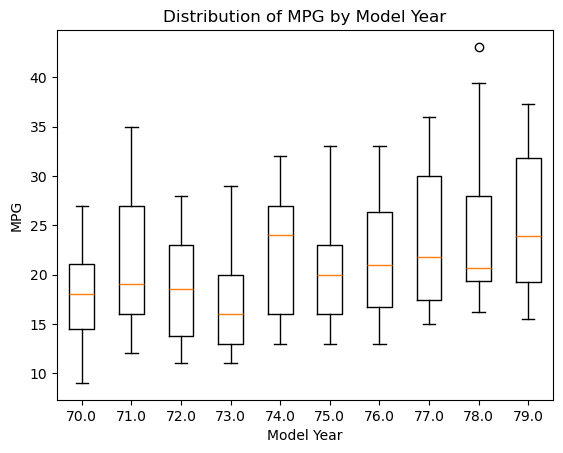

In [35]:
import utils
import plot_utils
import importlib
importlib.reload(utils)
importlib.reload(plot_utils)

from mypytable import MyPyTable  
import matplotlib.pyplot as plt

# Assuming table1 contains your data and header is the list of column names
header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name', 'msrp']

# group data by model year
unique_years, grouped_data = utils.group_by(table.data, header, 'model year')

# get the MPG values for each model year
values_per_year = utils.extract_mpg_from_groups(grouped_data, header)

# create the box plot
plot_utils.create_box_plot(
    mpg_values_per_year = values_per_year,
    unique_years = unique_years,
    xlabel = 'Model Year',
    ylabel = 'MPG',
    title = "Distribution of MPG by Model Year"
)

